In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='af123zan45syed%',
    database='ecommers'
)

cur = db.cursor()



# Basic Queries
# 1. List all unique cities where customers are located.


In [2]:


query = """ select distinct customer_city from customers"""

cur.execute(query)

data = cur.fetchall()

df=pd.DataFrame(data)

df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.

In [3]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are", data[0][0]

('Total orders placed in 2017 are', 541212)

# 3. Find the total sales per category.

In [4]:
import pandas as pd


# Correct way to create a DataFrame
data = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data)

print(df)


   col1  col2
0     1     3
1     2     4


In [5]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments on payments.order_id=
order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,3040431.96
1,FURNITURE DECORATION,8581058.35
2,TELEPHONY,2921292.30
3,BED TABLE BATH,10275322.03
4,AUTOMOTIVE,5113765.99
...,...,...
69,CDS MUSIC DVDS,7196.58
70,LA CUISINE,17481.18
71,FASHION CHILDREN'S CLOTHING,4714.02
72,PC GAMER,13046.58


#4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

#5. Count the number of customers from each state. 


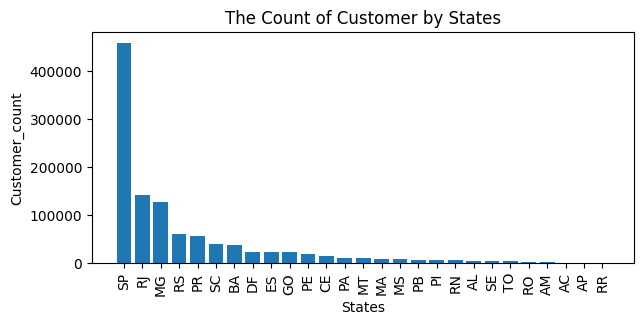

In [7]:
query = """select customer_state, count(customer_id) from customers group by customer_state"""

cur.execute(query)         # allowing the quering to print in cursor

data = cur.fetchall()        # pringting the curser
df = pd.DataFrame(data, columns=["State", "Customer_count"])    # creating new dataframe columns wise
df = df.sort_values(by="Customer_count", ascending=False)      # sorting values month A to Z wise 
plt.figure(figsize=(7,3))                               # figure use to increase and decrease the bar
plt.bar(df["State"], df["Customer_count"] )
plt.xticks(rotation=90)                            # use to rotate columns/rows label names
plt.xlabel("States")                               # Creating X name
plt.ylabel("Customer_count")                     # Creating y name
plt.title("The Count of Customer by States")    # Creating title name
plt.show()                             # printting the values

#Intermediate Queries


#1. Calculate the number of orders per month in 2018.

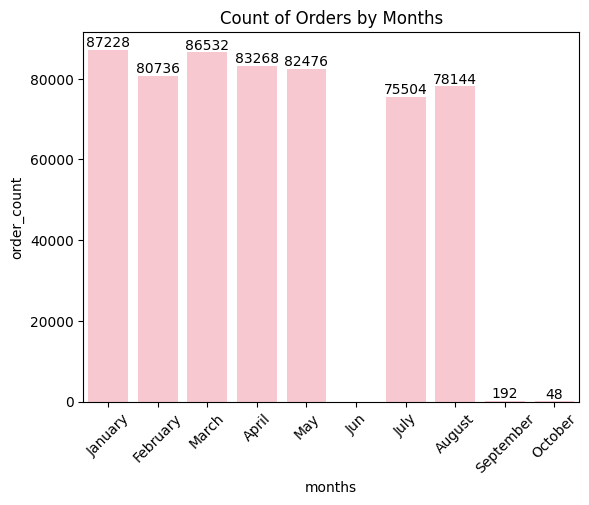

In [8]:
query = """ select monthname(order_purchase_timestamp) as months, count(order_id)
from orders where year(order_purchase_timestamp) = 2018 group by months"""

cur.execute(query) # allowing the quering to print in cursor

data = cur.fetchall()  # pringting the curser

df = pd.DataFrame(data, columns=["months","order_count"])    # creating new dataframe columns wise
o = ["January","February","March","April","May","Jun","July",
    "August","September","October"]
df = df.sort_values(by="months", ascending=False)  # sorting values month A to Z wise 
ax = sns.barplot(x = df["months"], y = df["order_count"], 
                 data=df,order=o, color = "pink") 
# using seaborn giving x,y values and coloring the bars
plt.xticks(rotation=45)                                      # use to rotate columns/rows label names 
plt.title("Count of Orders by Months")                  # Creating title name
ax.bar_label(ax.containers[0])                  # use to give bar lables
plt.show()

#2. Find the average number of products per order, grouped by customer city.

In [14]:
query = """
WITH count_per_order AS (
    SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)
SELECT customers.customer_city, ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city
ORDER BY average_orders DESC;
"""

cur.execute(query)  # Execute the query

data = cur.fetchall()  # Fetch the data
df = pd.DataFrame(data, columns=["customer_city", "average_orders"])  # Create DataFrame
df.head(10)  # Display the first 10 rows


,customer_city,average_orders
0,padre carvalho,504.00
1,celso ramos,468.00
2,datas,432.00
3,candido godoi,432.00
4,matias olimpio,360.00
5,cidelandia,288.00
6,curralinho,288.00
7,picarra,288.00
8,morro de sao paulo,288.00
9,teixeira soares,288.00


3. Calculate the percentage of total revenue contributed by each product category.

In [3]:
import numpy as np

query = """ SELECT UPPER(products.product_category) AS category, 
ROUND((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales_percentage DESC;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "Percentage Disdribution"])
df.head()

,Category,Percentage Disdribution
0,BED TABLE BATH,64.19
1,HEALTH BEAUTY,62.12
2,COMPUTER ACCESSORIES,59.42
3,FURNITURE DECORATION,53.60
4,WATCHES PRESENT,53.57


4. Identify the correlation between product price and the number of times a product has been purchased.

In [3]:
import numpy as np

query = """ select products.product_category, count(order_items.product_id),
round(avg(order_items.price),2) from products join order_items on 
products.product_id=order_items.product_id group by products.product_category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category","order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a=np.corrcoef([arr1,arr2])
print("The correlation between price and number of times product has been purchased is", a[0][-1])


The correlation between price and number of times product has been purchased is -0.1063151416715757


5. Calculate the total revenue generated by each seller, and rank them by revenue.

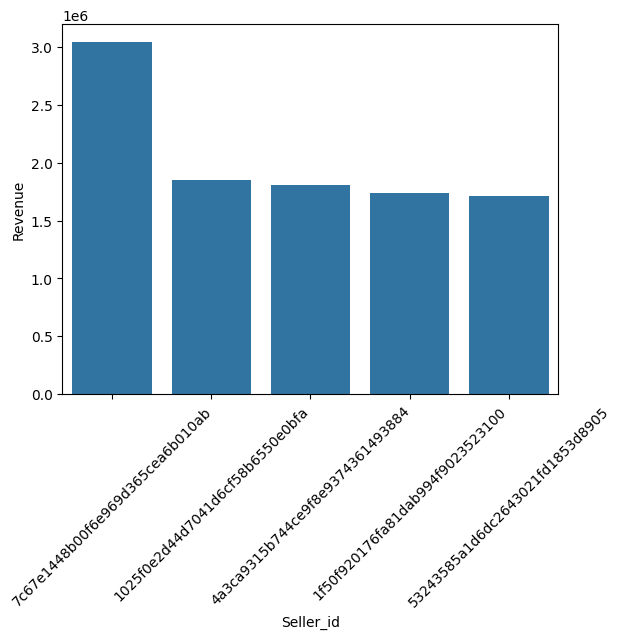

In [6]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from (select order_items.seller_id, 
sum(payments.payment_value) as revenue  from order_items join payments on
order_items.order_id=payments.order_id group by order_items.seller_id) as a
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Seller_id","Revenue","Rank"])
df = df.head()
sns.barplot(x = "Seller_id", y = "Revenue", data = df)
plt.xticks(rotation =45)

plt.show()

Advanced Queries
# 1. Calculate the moving average of order values for each customer over their order history.

In [2]:
query = """ select customer_id, order_purchase_timestamp, payment, avg(payment)
over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding 
and current row) as mov_average from 
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from
payments join orders on payments.order_id=orders.order_id) as a
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1246627,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246628,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246629,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246630,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


2. Calculate the cumulative sales per month for each year.

In [17]:
query = """ select years, months, payment, sum(payment) over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id=payments.order_id group by years, months) as a
"""

cur.execute(query)  # Execute the query

data = cur.fetchall()  # Fetch the data
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,3026.88,3.026880e+03
1,2016,10,709085.76,7.121126e+05
2,2016,12,235.44,7.123481e+05
3,2017,1,1661856.48,2.374205e+06
4,2017,2,3502896.11,5.877101e+06
5,2017,3,5398363.19,1.127546e+07
6,2017,4,5013456.35,1.628892e+07
7,2017,5,7115025.84,2.340395e+07
8,2017,6,6135316.56,2.953926e+07
9,2017,7,7108595.03,3.664786e+07


3. Calculate the year-over-year growth rate of total sales.

In [5]:
query = """ with a as (select year(orders.order_purchase_timestamp) as years, 
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id=payments.order_id group by years)

select years, (( payment - lag(payment,1) over(order by years))/ lag (payment,1) over(order by years)) * 100 from a 
"""

cur.execute(query)  # Execute the query

data = cur.fetchall()  # Fetch the data
df = pd.DataFrame(data, columns = ["years","yoy & growth"])
df

,years,yoy & growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [7]:
query = """ with a as(select customers.customer_id, min(orders.order_purchase_timestamp) first_order from customers join orders on
customers.customer_id=orders.customer_id
group by  customers.customer_id), 

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders on orders.customer_id=a.customer_id and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month) group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id)) from a left join b on a.customer_id=b.customer_id ;
"""

cur.execute(query)  # Execute the query

data = cur.fetchall()  # Fetch the data
data

[(None,)]

5. Identify the top 3 customers who spent the most money in each year.

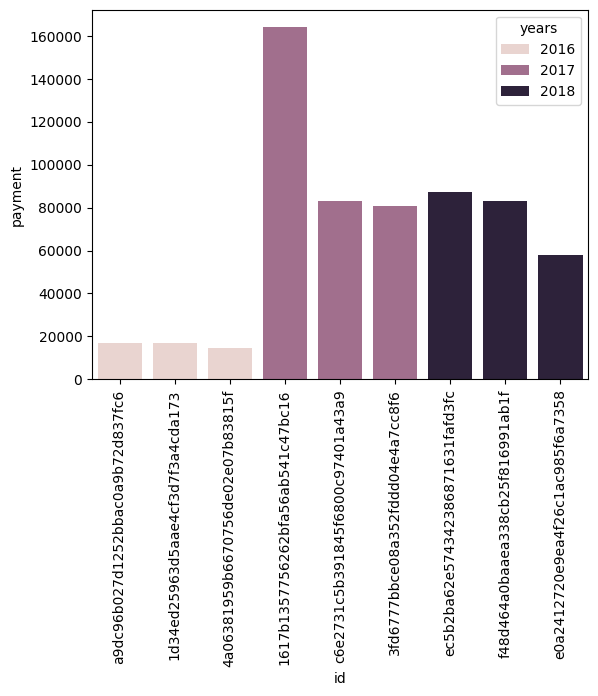

In [14]:
query = """ select years, customer_id, payment, d_rank from ( select year(orders.order_purchase_timestamp) as years,
orders.customer_id, sum(payments.payment_value) payment, dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank from orders join payments on payments.order_id=orders.order_id group by
year(orders.order_purchase_timestamp), orders.customer_id) as a where d_rank <=3
"""

cur.execute(query)  # Execute the query

data = cur.fetchall()  # Fetch the data
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x="id", y = "payment", data = df, hue = "years")
plt.xticks(rotation =90)
plt.show()